# Group 3 Data Science Project Proposal
### By: Hamza Salim, Nancy Ma, Nissan Chowdhury, Waasay Hussain Hussain

### Introduction:

Basketball is an intricate game involving a lot of factors which can affect a player’s performance. Scoring as many points as possible is the best way to win games, but being efficient in scoring also helps instead of shooting unnecessary shots. One of the most important statistics is looking at the effective field goal percentage (eFG%) of a player, which  looks at how successful, while factoring in the distance they shoot from. Another important factor to consider is the minutes a player plays per game. This indicates how valuable a player is in a team since more play time would lead to them scoring more points. Since it is also desirable to score as many points per game as possible, we can formulate the question “Can we predict a player’s career points per game (PPG), based on either their career effective field goal percentage (eFG%) or the minutes played per game (MPG)?” We will use a data set from GitHub which has the season stats for each player for every year and team they played for. The dataset also includes other statistics such as position, games started, steals, rebounds etc. However, we will only be needing a few of those columns to answer our question effectively.


In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
download.file("https://media.githubusercontent.com/media/danchyy/Basketball_Analytics/master/Data/nba_players_stats/Seasons_Stats.csv", "data/basketball.csv")



In [3]:
colnames<- c("index", "Year","Player","Pos","Age","Tm","G","GS","MP","PER","TS",
             "PAr","FTr","ORB","DRB","TRB","AST","STL","BLK",
             "TOV","USG","blanl","OWS","DWS","WS","WS_over_48",
             "blank2","OBPM","DBPM","BPM","VORP","FG","FGA",
             "FG","Three_P","three_PA","three_P_percent","two_P","two_PA","two_P_percent",
             "eFG_percent","FT","FTA","FT_percent","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","PTS")
basketball <- read_csv("data/basketball.csv", col_names=colnames, skip=1)

New names:
• `ORB` -> `ORB...14`
• `DRB` -> `DRB...15`
• `TRB` -> `TRB...16`
• `AST` -> `AST...17`
• `STL` -> `STL...18`
• `BLK` -> `BLK...19`
• `TOV` -> `TOV...20`
• `FG` -> `FG...32`
• `FG` -> `FG...34`
• `ORB` -> `ORB...45`
• `DRB` -> `DRB...46`
• `TRB` -> `TRB...47`
• `AST` -> `AST...48`
• `STL` -> `STL...49`
• `BLK` -> `BLK...50`
• `TOV` -> `TOV...51`
Rows: 24691 Columns: 53
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Player, Pos, Tm
dbl (48): index, Year, Age, G, GS, MP, PER, TS, PAr, FTr, ORB...14, DRB...15...
lgl  (2): blanl, blank2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Preliminary explanatory data analysis and methods:

We will wrangle and clean the data so that we can represent it properly for the visualization. Our method will be explained after each code block to explain each step of our wrangling and visualization process.

In [4]:
wrangle_basketball <- basketball|>
    select(Year, Player, eFG_percent, G, PTS, MP)|>
    filter(Year>=1980) |>
    group_by(Player) |>
    summarize(eFG_percent = mean(eFG_percent, na.rm = TRUE),
              G = sum(G, na.rm = TRUE),
              PTS = sum(PTS, na.rm = TRUE),
             MP = sum(MP, na.rm = TRUE)) |>
    mutate(PPG = PTS/G)|>
    mutate(MPG = MP/G)
wrangle_basketball

Player,eFG_percent,G,PTS,MP,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A.C. Green,0.4931667,1361,12928,39044,9.4988979,28.687730
A.J. Bramlett,0.1900000,8,8,61,1.0000000,7.625000
A.J. English,0.4385000,151,1502,3108,9.9470199,20.582781
A.J. Guyton,0.3106667,80,442,1246,5.5250000,15.575000
A.J. Hammons,0.4640000,22,48,163,2.1818182,7.409091
A.J. Price,0.4121111,287,1656,4253,5.7700348,14.818815
A.J. Wynder,0.2500000,6,12,39,2.0000000,6.500000
Aaron Brooks,0.4776667,797,7839,17088,9.8356336,21.440402
Aaron Gordon,0.4953333,205,1981,4958,9.6634146,24.185366


We took a basketball dataset and filtered it to include only data from 1980 onwards. We grouped by player then summarized the mean eFG_percent, total games played, total points, and total minutes played). We then mutate to get columns for Points Per Game (PPG) and Minutes Per Game (MPG) before displaying the result data frame.


In [5]:
set.seed(123)

We set the seed so the randomization can be reproducible.

In [6]:
basketball_split <- initial_split(data= wrangle_basketball, prop = 0.75, strata = PPG)
basketball_training <- training(basketball_split)
basketball_testing <- testing(basketball_split)

We split the data here because we are only going to use the training data for the exploratory data analysis.

In [7]:
mean_basketball <- basketball_training |>
    select(eFG_percent, G, PTS, PPG, MPG)|>
    map_df(mean, na.rm=TRUE)|>
    mutate(Stat = "Mean")|>
    relocate(Stat)
mean_basketball

Stat,eFG_percent,G,PTS,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,0.4432248,331.8085,3259.505,6.405044,16.54553


Here, we calculated the mean values of the ‘eFG_percent’, ‘G’, ‘PTS’, and ‘PPG’ columns from the ‘basketball_training’ data frame, removing any ‘NA’ values before computing the means and stored the results in a new data frame called ‘mean_basketball’.


In [8]:
max_basketball <- basketball_training |>
    select(eFG_percent, G, PTS, PPG, MPG)|>
    map_df(max, na.rm=TRUE)|>
    mutate(Stat = "Max")|>
    relocate(Stat)
max_basketball

Stat,eFG_percent,G,PTS,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Max,1,1921,36928,30.12313,40.69831


We do the same thing but instead calculate for the maximum for each column.


In [9]:
min_basketball <- basketball_training |>
    select(eFG_percent, G, PTS, PPG, MPG)|>
    map_df(min, na.rm=TRUE)|>
    mutate(Stat = "Min")|>
    relocate(Stat)
min_basketball

Stat,eFG_percent,G,PTS,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,0,1,0,0,0


Calculating for the minimum of each column.


In [10]:
sd_basketball <- basketball_training |>
    select(eFG_percent, G, PTS, PPG, MPG)|>
    map_df(sd, na.rm=TRUE)|>
    mutate(Stat = "Standard Deviation")|>
    relocate(Stat)
sd_basketball

Stat,eFG_percent,G,PTS,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Standard Deviation,0.09978356,348.6653,4885.069,4.721496,8.741119


Calculating for the standard deviation of each column.

In [11]:
stats_table <- rbind(mean_basketball, max_basketball, min_basketball, sd_basketball)

stats_table

Stat,eFG_percent,G,PTS,PPG,MPG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mean,0.44322483,331.8085,3259.505,6.405044,16.545530
Max,1.00000000,1921.0000,36928.000,30.123134,40.698308
Min,0.00000000,1.0000,0.000,0.000000,0.000000
Standard Deviation,0.09978356,348.6653,4885.069,4.721496,8.741119


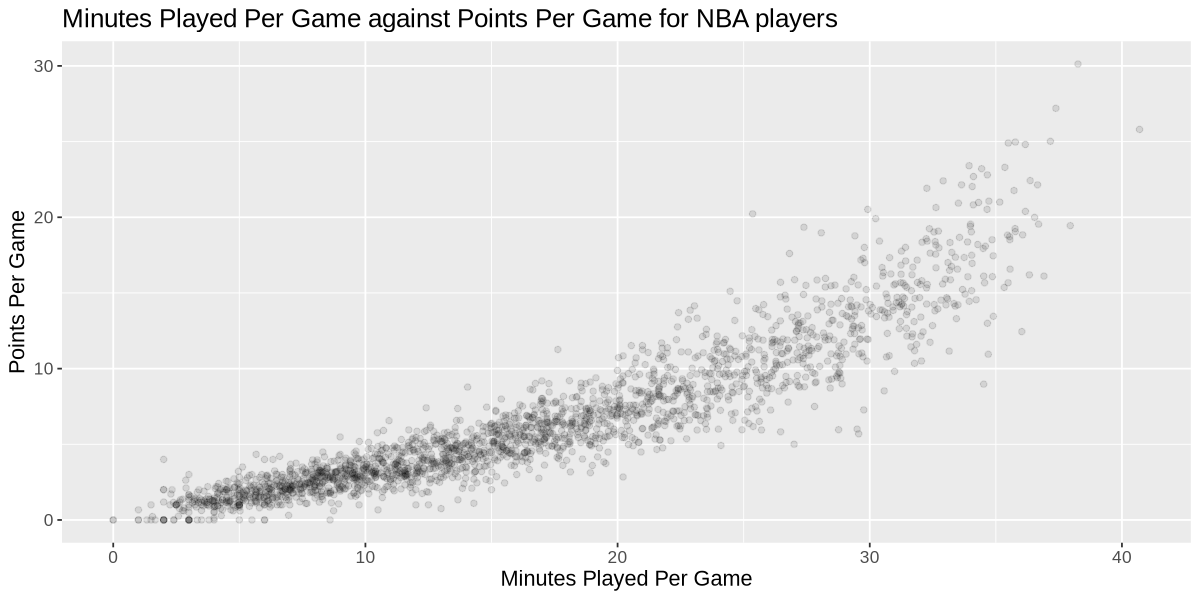

In [12]:
options(repr.plot.width=10, repr.plot.height=5)
mpg_point_plot <- ggplot(basketball_training, aes(x = MPG, y=PPG))+
    geom_point(alpha=0.1)+
    labs(x="Minutes Played Per Game",
        y="Points Per Game")+
    ggtitle("Minutes Played Per Game against Points Per Game for NBA players")+
    theme(text=element_text(size=13))

mpg_point_plot

Here, we created a scatter plot visualising the relationship between minutes played per game (MPG) and points per game (PPG) for NBA players for the training data, with points having a slight transparency (alpha = 0.1), specific axis labels, title, and text size in the plot.

Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


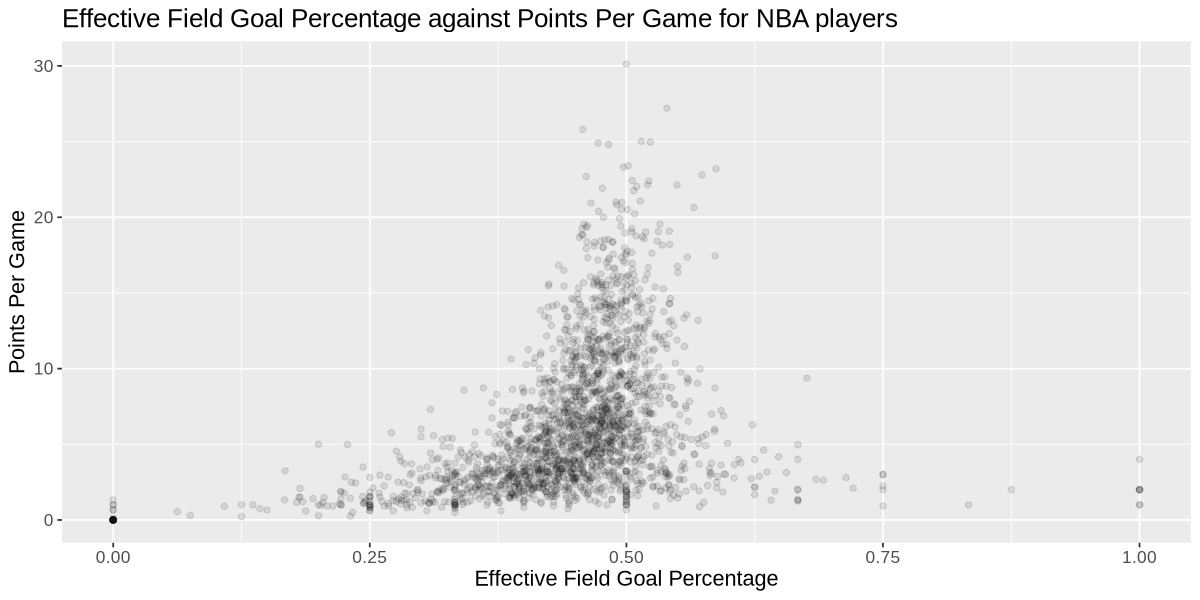

In [13]:
options(repr.plot.width=10, repr.plot.height=5)
efg_point_plot <- ggplot(basketball_training, aes(x = eFG_percent, y=PPG))+
    geom_point(alpha=0.1)+
    labs(x="Effective Field Goal Percentage",
        y="Points Per Game")+
    ggtitle("Effective Field Goal Percentage against Points Per Game for NBA players")+
    theme(text=element_text(size=13))

efg_point_plot

Here, we created a scatter plot visualising the relationship between effective field goal percentage (EFG_percent) and points per game (PPG) for NBA players for the training data, with points having a slight transparency (alpha = 0.1), specific axis labels, title, and text size in the plot.



Looking at the data, we find that the distribution of the effective field goal percentage resembles that of a bell curve. However, that would not be useful for us to use it for a regression due to it's shape. Furthermore, the relationship between minutes per game and points per game is linear, so it will be easier and more useful to predict the points per game a player will average depending on how many minutes they usually play per game. Therefore, we will update our question to "Can we use a linear model to predict a player’s career points per game (PPG), based on their minutes played per game (MPG)?" 

### Expected outcomes and significance:
We expect to find strong relationship between a player's minutes played per game and their points per game. Since the line looks quite linear, we can create a linear model get an equation for the line with a low root mean square error (RMSE) without worrying about there being a hidden non-linear trend.
With these findings, it would be helpful to predict a player’s performance in the game and it can also aid in drafting/ signing players for a team since the minutes they play could dictate the predicted points they would contribute for a game.
A future question we could explore is 'Would it be useful for players to focus on playing more minutes per game to increase the number of points per game in the future?' to see whether having many players who play a lot of minutes will translate into better performance for the team. Another question this analysis could lead to is 'Could we represent this regression in a non-linear form?' to see whether we can get an equation from a non-linear regression and obtain a lower RMSE to improve the reliability of our model.